In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import itertools

In [ ]:
dir_name = "/home/oriol/Oriol/GH_A/glca_deprot/clas_deprot/"
top_file = dir_name + "3vo0_deprot.prmtop"
file = dir_name + "3vo0_deprot_eq.mdcrd"
traj = md.load_netcdf(file, top = top_file)

In [4]:
%%time
dir_name = "/home/oriol/Oriol/GH_A/2_glca_deprot/clas_deprot/"
top_file = dir_name + "3vo0_deprot.prmtop"
file = dir_name + "3vo0_deprot_eq.mdcrd"
traj = md.load_netcdf(file, top = top_file)

CPU times: user 784 ms, sys: 148 ms, total: 932 ms
Wall time: 2.67 s


In [5]:
%%time
top = traj.topology
acid_base = top.select('resid 155 and sidechain and type O') #0-based index, residue 156 [E173]
c_anom = top.select('resname GUG and name C1')
H_wat = top.select('water and type H')
O_wat = top.select('water and type O')

CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 100 ms


In [6]:
%%time
pair_array_H = np.array(list(itertools.product(H_wat, acid_base)))
pair_array_O = np.array(list(itertools.product(O_wat, c_anom)))

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 21.5 ms


In [7]:
%%time
dist_H = md.compute_distances(traj, pair_array_H)
dist_O = md.compute_distances(traj, pair_array_O)

CPU times: user 152 ms, sys: 24 ms, total: 176 ms
Wall time: 220 ms


In [23]:
dist_H

array([[5.233759 , 5.388864 , 5.0903893, ..., 4.9913387, 4.907537 ,
        4.959315 ],
       [5.0908337, 5.245006 , 5.0708175, ..., 4.670887 , 4.3917775,
        4.6004205],
       [5.1369886, 5.328434 , 5.0887747, ..., 4.325869 , 4.1479115,
        4.242706 ],
       ...,
       [4.7836413, 4.9436283, 4.7608433, ..., 3.2970939, 3.1958373,
        3.3428748],
       [4.3477154, 4.52875  , 4.3597813, ..., 3.7992747, 3.6092062,
        3.7231586],
       [4.623518 , 4.7960997, 4.677809 , ..., 3.7913907, 3.7685635,
        3.8992832]], dtype=float32)

In [9]:
dist_O.shape[0]

300

In [69]:
%%time
O_cutoff = 0.5
H_cutoff = 0.4
close_wat = []
for i in range(dist_O.shape[0]):
#for i in range(300):    
    
    count = 0
    for j in range(dist_O.shape[1]):
        if dist_O[i,j]>O_cutoff:
            continue

        for k in range(4):
            if dist_H[i,4*j+k]<H_cutoff:
                count+=1
                break
    close_wat.append([i,count])


CPU times: user 6.18 s, sys: 4 ms, total: 6.18 s
Wall time: 6.18 s


In [92]:
close_wat=np.array(close_wat)

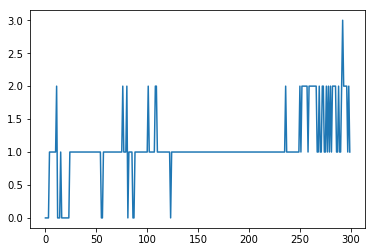

In [93]:
plt.plot(close_wat[:,0],close_wat[:,1])

O 6969
H 6970
H 6971
...

In [90]:
close_wat[[0]]

TypeError: list indices must be integers or slices, not list

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

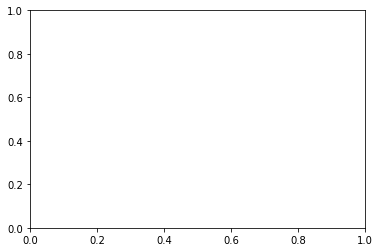

In [43]:
plt.plot(my_dict.keys,my_dict.values)

In [7]:
dist_H

array([[5.233759 , 5.388864 , 5.0903893, ..., 4.9913387, 4.907537 ,
        4.959315 ],
       [5.0908337, 5.245006 , 5.0708175, ..., 4.670887 , 4.3917775,
        4.6004205],
       [5.1369886, 5.328434 , 5.0887747, ..., 4.325869 , 4.1479115,
        4.242706 ],
       ...,
       [4.7836413, 4.9436283, 4.7608433, ..., 3.2970939, 3.1958373,
        3.3428748],
       [4.3477154, 4.52875  , 4.3597813, ..., 3.7992747, 3.6092062,
        3.7231586],
       [4.623518 , 4.7960997, 4.677809 , ..., 3.7913907, 3.7685635,
        3.8992832]], dtype=float32)

In [91]:
for i in range(dist_H.shape[0]):
    a = np.compress(dist_H[i]<=0.25,dist_H[i]) #0.25nm

In [98]:
for i in range(dist_O.shape[0]):
    b = np.compress(dist_O[i]<=0.5,dist_O[i]) #0.35nm

In [99]:
a, b

(array([0.17816012, 0.19624838], dtype=float32),
 array([0.39854807], dtype=float32))

In [42]:
dist_H = md.compute_distances(traj, pair_array_H)
dist_O = md.compute_distances(traj, pair_array_H

dist_H = np.where(, md.compute_distances(traj, pair_array_H))
dist_O = md.compute_distances(traj, pair_array_O)

In [ ]:
with plt.style.context(('bmh')):
    plt.figure(1, figsize=(20,5))
    line1 = plt.plot(pcoords, dist[1]*10, label = "Subunit A")
    line2 = plt.plot(pcoords, dist[2]*10, label = "Subunit B")
    line3 = plt.plot(pcoords, dist[3]*10, label = "Subunit C")
    plt.xlabel("Progress coordinate [Å/2]")
    plt.ylabel("Distance [Å]")
    plt.legend()
    plt.savefig("Dist_pcoord_1chain_{}.png".format(name))
    plt.show()

In [ ]:
# Llegir frame per frame per no petar la ram
md.open("asd", mode = 'r')
md.seek(0,0)
md.seek(1,1)